In [1]:
import pandas as pd
import numpy as np
from sklearn import *

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [6]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection\
.train_test_split(X.values, y
                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [7]:
y_test_pred = pipe.predict(X_test)

In [8]:
y_train_pred = pipe.predict(X_train)

In [9]:
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [11]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [12]:
print("test accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("train accuracy", metrics.accuracy_score(y_train, y_train_pred))
print("test precision", metrics.precision_score(y_test, y_test_pred))
print("train precision", metrics.precision_score(y_train, y_train_pred))
print("test recall", metrics.recall_score(y_test, y_test_pred))
print("train recall", metrics.recall_score(y_train, y_train_pred))

test accuracy 0.7566666666666667
train accuracy 0.7957142857142857
test precision 0.6
train precision 0.6961325966850829
test recall 0.45348837209302323
train recall 0.5887850467289719


In [13]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

In [14]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [20]:
y_test_pred = np.where(y_test_prob>0.764420, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[209,   5],
       [ 69,  17]])

In [21]:
fpr = 5/(5+209)
fpr

0.02336448598130841

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [24]:
pd.DataFrame(dict(fpr=fpr, tpr=tpr, threshold=thresholds))

,fpr,tpr,threshold
0,0.000000,0.000000,1.961698
1,0.000000,0.011628,0.961698
2,0.014019,0.011628,0.930588
3,0.014019,0.174419,0.822168
4,0.023364,0.174419,0.805632
5,0.023364,0.197674,0.764420
6,0.037383,0.197674,0.742418
7,0.037383,0.209302,0.728124
8,0.046729,0.209302,0.717631
9,0.046729,0.220930,0.707083


In [25]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'ROC')

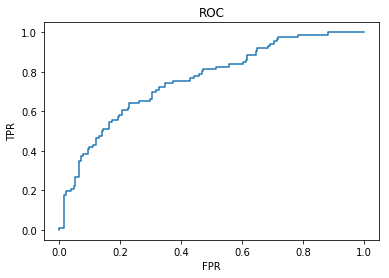

In [26]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")

In [28]:
auc = metrics.auc(fpr, tpr)
auc

0.758476418169963